# Project: Investigate a Dataset (No Show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and 'Yes' if they did not show up.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [8]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Number of Rows and Columns


In [10]:
df.shape

(110527, 14)

# Inspect Data and looking for missing data


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There's probably a mistake with min age (-1)

Max age is 115

The mean of age is 37 years

# Cleaning the data and dropping some data that not used in analyis


In [15]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## Exploratory Data Analysis




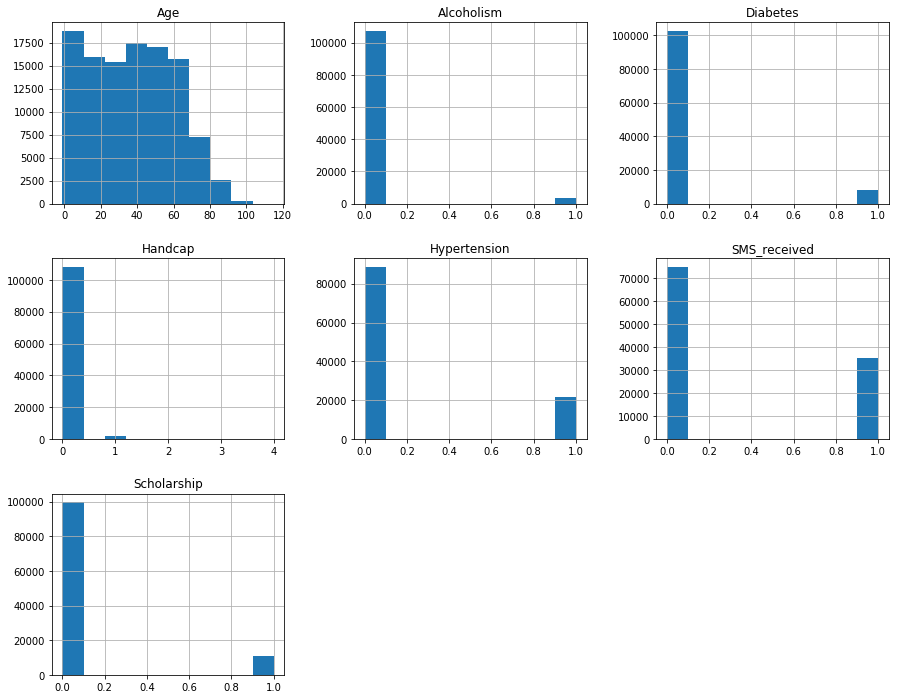

In [19]:
df.hist(figsize=(15,12));

Most of the people didn't suffer from chronic diseases

Only around 50% of the patients received Sms


In [21]:
show=df.No_show=="No"
noshow=df.No_show=="Yes"


In [22]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [23]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

# Patients who showed up Vs Patients who didn't show up according to gender

Text(0,0.5,'Patients Number')

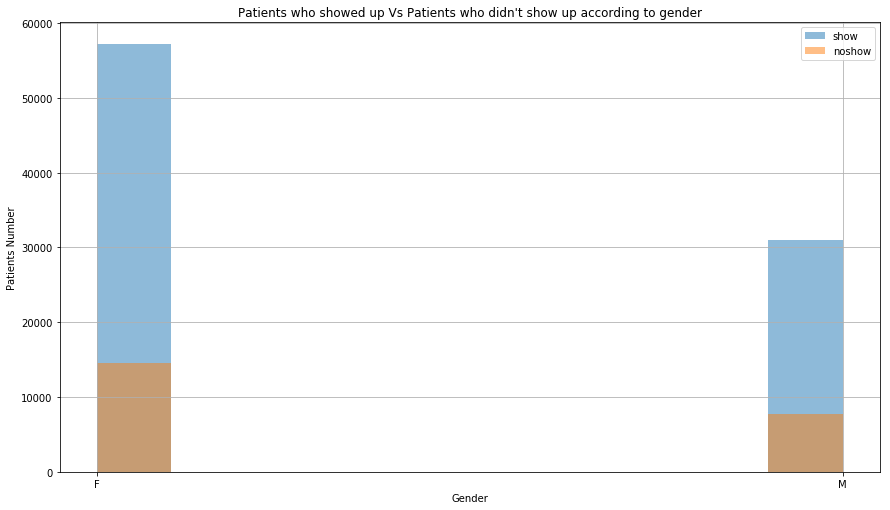

In [25]:
plt.figure(figsize=[14.70,8.27])
df.Gender[show].hist(alpha=0.5,label='show')
df.Gender[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to gender")
plt.xlabel('Gender')
plt.ylabel('Patients Number')

The number of people who didn't show up is approximately 25% of who did show up

In [27]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [28]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Gender is insignificant as Females who showed up are more than males and Females that didn't show up are also more than males

# Patients who showed up Vs Patients who didn't show up according to enrollment in the Brazilian welfare Program

Text(0,0.5,'Patients Number')

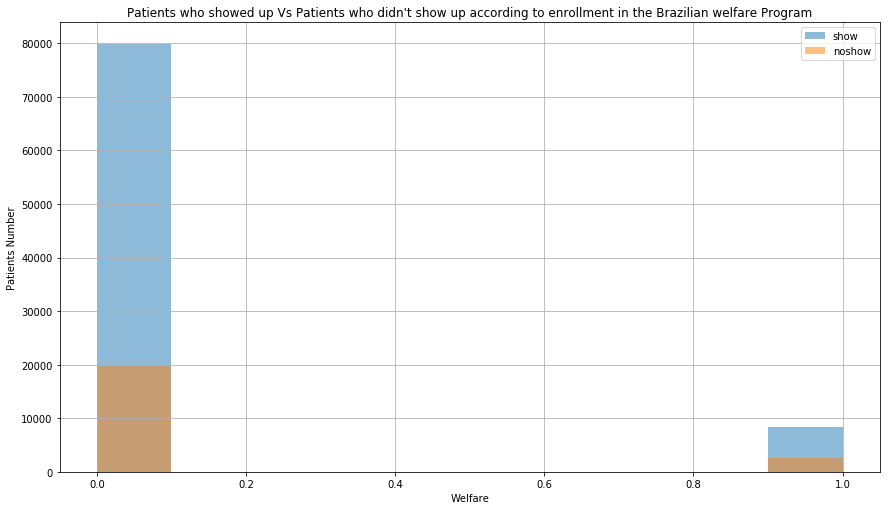

In [29]:
plt.figure(figsize=[14.70,8.27])
df.Scholarship[show].hist(alpha=0.5,label='show')
df.Scholarship[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to enrollment in the Brazilian welfare Program")
plt.xlabel('Welfare')
plt.ylabel('Patients Number')


Being enrolled in the Welfare program is insignificant

# Patients who showed up Vs Patients who didn't show up according to having Hypertension or Not

Text(0,0.5,'Patients Number')

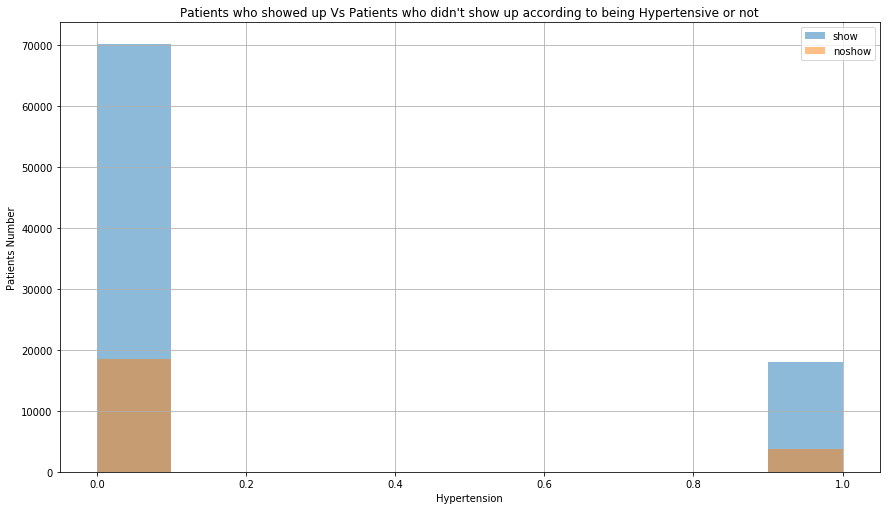

In [30]:
plt.figure(figsize=[14.70,8.27])
df.Hypertension[show].hist(alpha=0.5,label='show')
df.Hypertension[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to being Hypertensive or not")
plt.xlabel('Hypertension')
plt.ylabel('Patients Number')

Having Hypertension is insignifant


# Patients who showed up Vs Patients who didn't show up according to Age

Being a Handicapped or Not is insignificant

Text(0,0.5,'Patients Number')

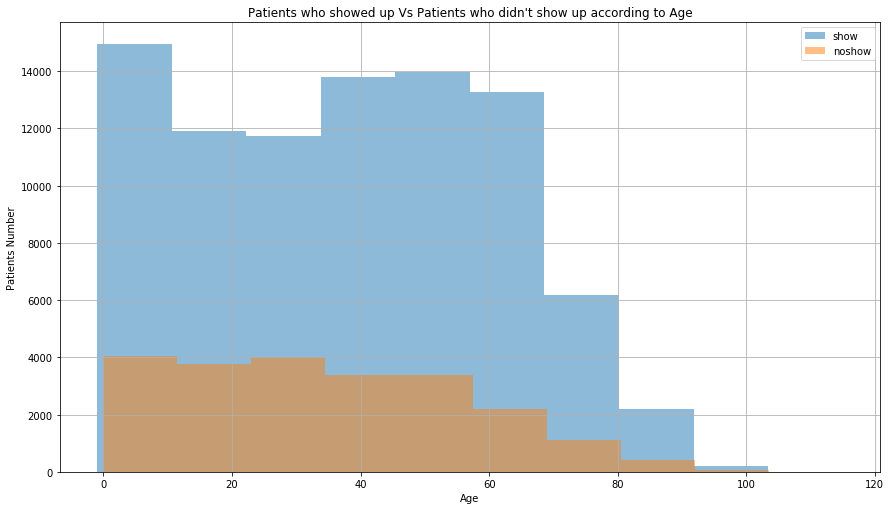

In [33]:
plt.figure(figsize=[14.70,8.27])
df.Age[show].hist(alpha=0.5,label='show')
df.Age[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to Age")
plt.xlabel('Age')
plt.ylabel('Patients Number')

People in Age range (0-10) showed more than all others followed by range (35-70)

people older than 70 are less likely to get an appointment

# Patients who showed up Vs Patients who didn't show up according to the Neighbourhood they live in

Text(0,0.5,'Patients Number')

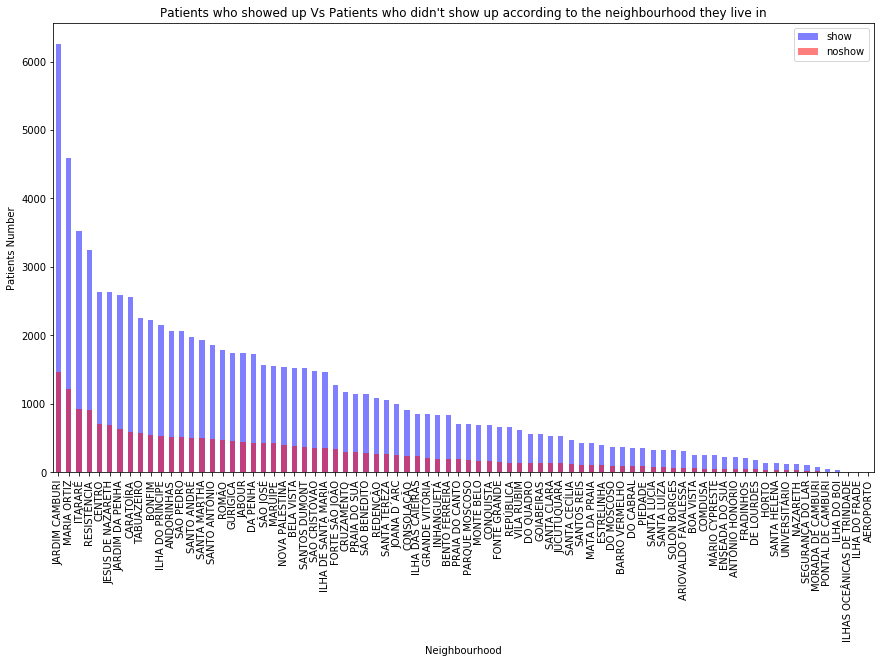

In [36]:
plt.figure(figsize=[14.70,8.27])
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',alpha=0.5,color='red',label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to the neighbourhood they live in")
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number')

The Neighbourhood they live in is highly signifant 


# Patients who showed up Vs Patients who didn't show up according to SMS received

Text(0,0.5,'Patients Number')

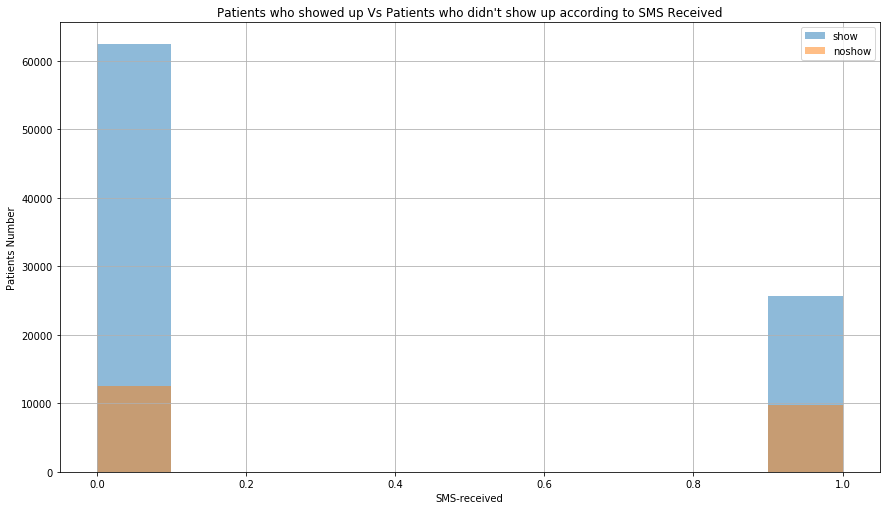

In [38]:
plt.figure(figsize=[14.70,8.27])
df.SMS_received[show].hist(alpha=0.5,label='show')
df.SMS_received[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to SMS Received")
plt.xlabel('SMS-received')
plt.ylabel('Patients Number')

People Who showed up without receiving SMS is more than who didn't receive So its highly insignificant

# Patients who showed up Vs Patients who didn't show up according to Alcoholism

Text(0,0.5,'Patients Number')

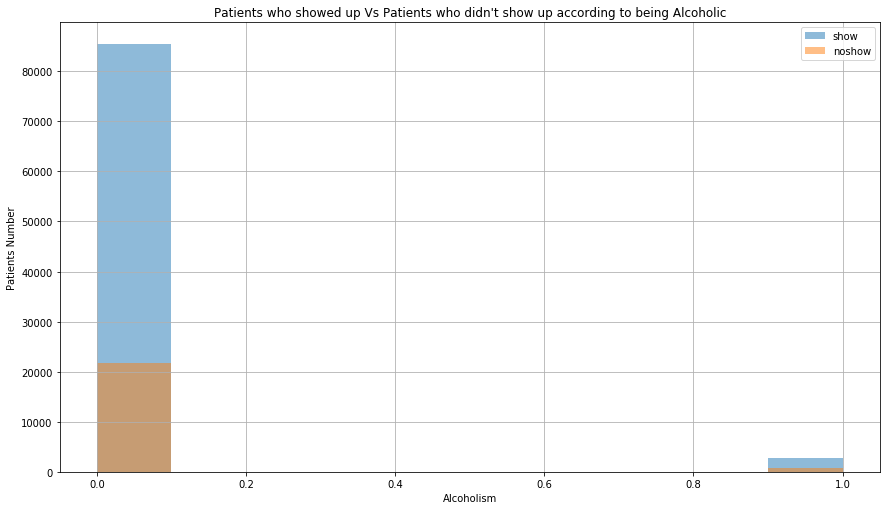

In [39]:
plt.figure(figsize=[14.70,8.27])
df.Alcoholism[show].hist(alpha=0.5,label='show')
df.Alcoholism[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to Alcoholism")
plt.xlabel('Alcoholism')
plt.ylabel('Patients Number')

Being Alcoholic or Not is insginicant

# Patients who showed up Vs Patients who didn't show up according to Diabetes

Text(0,0.5,'Patients Number')

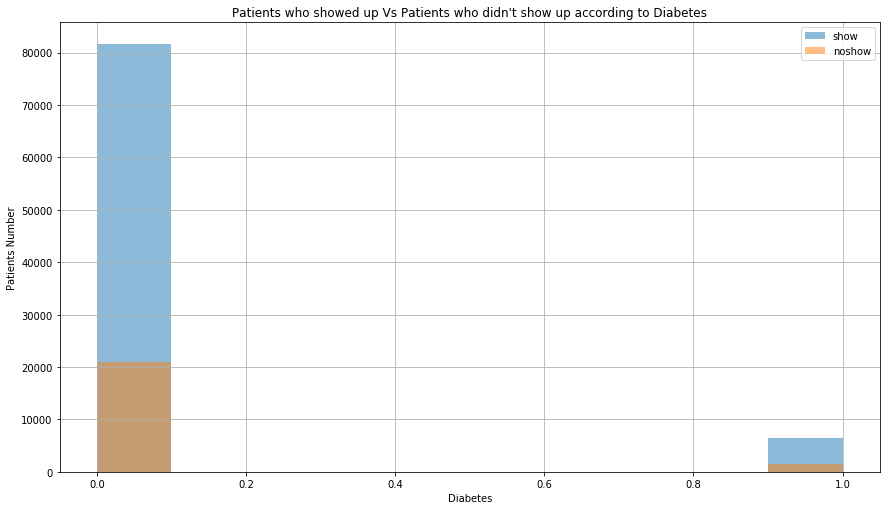

In [41]:
plt.figure(figsize=[14.70,8.27])
df.Diabetes[show].hist(alpha=0.5,label='show')
df.Diabetes[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title("Patients who showed up Vs Patients who didn't show up according to Diabetes")
plt.xlabel('Diabetes')
plt.ylabel('Patients Number')

Being diabetic or not is highly insignificant

# Conclusions:-

Neighbourhood is strongle affecting whether they show up or not

People in the age range (0-10) were the most to show up followed by the age range(35-70)



In [47]:
from subprocess import call
call(['python','-m','nbconvert','Investigate_a_Dataset.ipynb'])

0